**PROYECTO 3**
Realizado por: 
          * Jamerson Correa
          * Daniel Mesa
          

Utilizamos como muestra poblacional Las mujeres y hombres jovenes de Colombia, dado que según reportes son los principales promotores de que el virus sea propagado.

In [0]:
#Traemos las librerías necesarías google colab
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Proveemos un entorno de desarrollo Spark para Google Colab

In [0]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q https://downloads.apache.org/spark/spark-2.4.5/spark-2.4.5-bin-hadoop2.6.tgz
!tar xf spark-2.4.5-bin-hadoop2.6.tgz
!pip install -q findspark

In [0]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-2.4.5-bin-hadoop2.6"

In [0]:
import findspark
findspark.init()
from pyspark.sql import SparkSession
spark = SparkSession.builder.master("local[*]").getOrCreate()
sc = spark.sparkContext

In [0]:
from google.colab import files

**Para usar desde el clúster EMR**

In [0]:
sc

In [0]:
from pyspark.sql import SparkSession

In [0]:
sc.install_pypi_package("matplotlib")
sc.install_pypi_package("Pandas")
import pandas as pd
import matplotlib.pyplot as plt

In [0]:
spark=SparkSession.builder.appName('data_covid').getOrCreate()

**Traer datos desde s3**

In [0]:
dfc=spark.read.csv('s3://jscorreacdatasets/covid-19/data.csv',inferSchema=True,header=True)

In [0]:
dfm=spark.read.csv('s3://jscorreacdatasets/covid-19/time_series_covid19_confirmed_global_iso3_regions.csv',inferSchema=True,header=True)

In [0]:
dfm_recovered=spark.read.csv('s3://jscorreacdatasets/covid-19/time_series_covid19_recovered_global.csv',inferSchema=True,header=True)

In [0]:
dfm_death=spark.read.csv('s3://jscorreacdatasets/covid-19/time_series_covid19_deaths_global.csv',inferSchema=True,header=True)

In [0]:
dfm_narrow=spark.read.csv('s3://jscorreacdatasets/covid-19/time_series_covid19_confirmed_global_narrow.csv',inferSchema=True,header=True)

In [0]:
dfm_recovered_narrow = spark.read.csv('s3://jscorreacdatasets/covid-19/time_series_covid19_recovered_global_narrow.csv',inferSchema=True,header=True)

In [0]:
dfm_death_narrow = spark.read.csv('s3://jscorreacdatasets/covid-19/time_series_covid19_deaths_global_narrow.csv',inferSchema=True,header=True)

In [0]:
dfm_death_iso = spark.read.csv('s3://jscorreacdatasets/covid-19/time_series_covid19_deaths_global_iso3_regions.csv',inferSchema=True,header=True)

In [0]:
dfm_recovered_iso = spark.read.csv('s3://jscorreacdatasets/covid-19/time_series_covid19_recovered_global_iso3_regions.csv',inferSchema=True,header=True)

**Cargamos los datasets para google colab desde local**

In [128]:

files.upload()

{}

**Creamos los Data Frame de trabajo**

In [0]:
spark=SparkSession.builder.appName('data_covid').getOrCreate()

In [0]:
dfm=spark.read.csv('time_series_covid19_confirmed_global_iso3_regions.csv',inferSchema=True,header=True)

In [0]:
dfm_narrow=spark.read.csv('time_series_covid19_confirmed_global_narrow.csv',inferSchema=True,header=True)

In [0]:
dfm_recovered=spark.read.csv('time_series_covid19_recovered_global.csv',inferSchema=True,header=True)

In [0]:
dfm_death=spark.read.csv('time_series_covid19_deaths_global.csv',inferSchema=True,header=True)

In [0]:
dfm_recovered_iso = spark.read.csv('time_series_covid19_recovered_global_iso3_regions.csv',inferSchema=True,header=True)

In [0]:
dfm_recovered_narrow = spark.read.csv('time_series_covid19_recovered_global_narrow.csv',inferSchema=True,header=True)

In [0]:
dfm_death_narrow = spark.read.csv('time_series_covid19_deaths_global_narrow.csv',inferSchema=True,header=True)

In [0]:
dfm_death_iso = spark.read.csv('time_series_covid19_deaths_global_iso3_regions.csv',inferSchema=True,header=True)

In [0]:
#Data Frame de Colombia#
dfc=spark.read.csv('data.csv',inferSchema=True,header=True)

**Observamos de qué se conforma cada datasets**

In [0]:
dfm.printSchema()

root
 |-- Province/State: string (nullable = true)
 |-- Country/Region: string (nullable = true)
 |-- Lat: string (nullable = true)
 |-- Long: string (nullable = true)
 |-- 1/22/20: integer (nullable = true)
 |-- 1/23/20: integer (nullable = true)
 |-- 1/24/20: integer (nullable = true)
 |-- 1/25/20: integer (nullable = true)
 |-- 1/26/20: integer (nullable = true)
 |-- 1/27/20: integer (nullable = true)
 |-- 1/28/20: integer (nullable = true)
 |-- 1/29/20: integer (nullable = true)
 |-- 1/30/20: integer (nullable = true)
 |-- 1/31/20: integer (nullable = true)
 |-- 2/1/20: integer (nullable = true)
 |-- 2/2/20: integer (nullable = true)
 |-- 2/3/20: integer (nullable = true)
 |-- 2/4/20: integer (nullable = true)
 |-- 2/5/20: integer (nullable = true)
 |-- 2/6/20: integer (nullable = true)
 |-- 2/7/20: integer (nullable = true)
 |-- 2/8/20: integer (nullable = true)
 |-- 2/9/20: integer (nullable = true)
 |-- 2/10/20: integer (nullable = true)
 |-- 2/11/20: integer (nullable = true)
 

In [0]:
dfm_narrow.printSchema()

root
 |-- Province/State: string (nullable = true)
 |-- Country/Region: string (nullable = true)
 |-- Lat: string (nullable = true)
 |-- Long: string (nullable = true)
 |-- Date: string (nullable = true)
 |-- Value: string (nullable = true)
 |-- ISO 3166-1 Alpha 3-Codes: string (nullable = true)
 |-- Region Code: string (nullable = true)
 |-- Sub-region Code: string (nullable = true)
 |-- Intermediate Region Code: string (nullable = true)



In [0]:
dfm_death.printSchema()

root
 |-- Province/State: string (nullable = true)
 |-- Country/Region: string (nullable = true)
 |-- Lat: double (nullable = true)
 |-- Long: double (nullable = true)
 |-- 1/22/20: integer (nullable = true)
 |-- 1/23/20: integer (nullable = true)
 |-- 1/24/20: integer (nullable = true)
 |-- 1/25/20: integer (nullable = true)
 |-- 1/26/20: integer (nullable = true)
 |-- 1/27/20: integer (nullable = true)
 |-- 1/28/20: integer (nullable = true)
 |-- 1/29/20: integer (nullable = true)
 |-- 1/30/20: integer (nullable = true)
 |-- 1/31/20: integer (nullable = true)
 |-- 2/1/20: integer (nullable = true)
 |-- 2/2/20: integer (nullable = true)
 |-- 2/3/20: integer (nullable = true)
 |-- 2/4/20: integer (nullable = true)
 |-- 2/5/20: integer (nullable = true)
 |-- 2/6/20: integer (nullable = true)
 |-- 2/7/20: integer (nullable = true)
 |-- 2/8/20: integer (nullable = true)
 |-- 2/9/20: integer (nullable = true)
 |-- 2/10/20: integer (nullable = true)
 |-- 2/11/20: integer (nullable = true)
 

In [0]:
dfm_death_iso.printSchema()

root
 |-- Province/State: string (nullable = true)
 |-- Country/Region: string (nullable = true)
 |-- Lat: string (nullable = true)
 |-- Long: string (nullable = true)
 |-- 1/22/20: integer (nullable = true)
 |-- 1/23/20: integer (nullable = true)
 |-- 1/24/20: integer (nullable = true)
 |-- 1/25/20: integer (nullable = true)
 |-- 1/26/20: integer (nullable = true)
 |-- 1/27/20: integer (nullable = true)
 |-- 1/28/20: integer (nullable = true)
 |-- 1/29/20: integer (nullable = true)
 |-- 1/30/20: integer (nullable = true)
 |-- 1/31/20: integer (nullable = true)
 |-- 2/1/20: integer (nullable = true)
 |-- 2/2/20: integer (nullable = true)
 |-- 2/3/20: integer (nullable = true)
 |-- 2/4/20: integer (nullable = true)
 |-- 2/5/20: integer (nullable = true)
 |-- 2/6/20: integer (nullable = true)
 |-- 2/7/20: integer (nullable = true)
 |-- 2/8/20: integer (nullable = true)
 |-- 2/9/20: integer (nullable = true)
 |-- 2/10/20: integer (nullable = true)
 |-- 2/11/20: integer (nullable = true)
 

In [0]:
dfm_death_narrow.printSchema()

root
 |-- Province/State: string (nullable = true)
 |-- Country/Region: string (nullable = true)
 |-- Lat: string (nullable = true)
 |-- Long: string (nullable = true)
 |-- Date: string (nullable = true)
 |-- Value: string (nullable = true)
 |-- ISO 3166-1 Alpha 3-Codes: string (nullable = true)
 |-- Region Code: string (nullable = true)
 |-- Sub-region Code: string (nullable = true)
 |-- Intermediate Region Code: string (nullable = true)



In [0]:
dfm_recovered.printSchema()

root
 |-- Province/State: string (nullable = true)
 |-- Country/Region: string (nullable = true)
 |-- Lat: double (nullable = true)
 |-- Long: double (nullable = true)
 |-- 1/22/20: integer (nullable = true)
 |-- 1/23/20: integer (nullable = true)
 |-- 1/24/20: integer (nullable = true)
 |-- 1/25/20: integer (nullable = true)
 |-- 1/26/20: integer (nullable = true)
 |-- 1/27/20: integer (nullable = true)
 |-- 1/28/20: integer (nullable = true)
 |-- 1/29/20: integer (nullable = true)
 |-- 1/30/20: integer (nullable = true)
 |-- 1/31/20: integer (nullable = true)
 |-- 2/1/20: integer (nullable = true)
 |-- 2/2/20: integer (nullable = true)
 |-- 2/3/20: integer (nullable = true)
 |-- 2/4/20: integer (nullable = true)
 |-- 2/5/20: integer (nullable = true)
 |-- 2/6/20: integer (nullable = true)
 |-- 2/7/20: integer (nullable = true)
 |-- 2/8/20: integer (nullable = true)
 |-- 2/9/20: integer (nullable = true)
 |-- 2/10/20: integer (nullable = true)
 |-- 2/11/20: integer (nullable = true)
 

In [0]:
dfm_recovered_iso.printSchema()

root
 |-- Province/State: string (nullable = true)
 |-- Country/Region: string (nullable = true)
 |-- Lat: string (nullable = true)
 |-- Long: string (nullable = true)
 |-- 1/22/20: integer (nullable = true)
 |-- 1/23/20: integer (nullable = true)
 |-- 1/24/20: integer (nullable = true)
 |-- 1/25/20: integer (nullable = true)
 |-- 1/26/20: integer (nullable = true)
 |-- 1/27/20: integer (nullable = true)
 |-- 1/28/20: integer (nullable = true)
 |-- 1/29/20: integer (nullable = true)
 |-- 1/30/20: integer (nullable = true)
 |-- 1/31/20: integer (nullable = true)
 |-- 2/1/20: integer (nullable = true)
 |-- 2/2/20: integer (nullable = true)
 |-- 2/3/20: integer (nullable = true)
 |-- 2/4/20: integer (nullable = true)
 |-- 2/5/20: integer (nullable = true)
 |-- 2/6/20: integer (nullable = true)
 |-- 2/7/20: integer (nullable = true)
 |-- 2/8/20: integer (nullable = true)
 |-- 2/9/20: integer (nullable = true)
 |-- 2/10/20: integer (nullable = true)
 |-- 2/11/20: integer (nullable = true)
 

In [0]:
dfm_recovered_narrow.printSchema()

root
 |-- Province/State: string (nullable = true)
 |-- Country/Region: string (nullable = true)
 |-- Lat: string (nullable = true)
 |-- Long: string (nullable = true)
 |-- Date: string (nullable = true)
 |-- Value: string (nullable = true)
 |-- ISO 3166-1 Alpha 3-Codes: string (nullable = true)
 |-- Region Code: string (nullable = true)
 |-- Sub-region Code: string (nullable = true)
 |-- Intermediate Region Code: string (nullable = true)



**Vemos con cuántas Filas y columnas cuenta cada Data Frame**

In [0]:
print((dfm.count(),len(dfm.columns)))

(267, 125)


In [0]:
print((dfm_narrow.count(),len(dfm_narrow.columns)))

(30857, 10)


In [0]:
print((dfm_recovered.count(),len(dfm_recovered.columns)))

(253, 119)


In [0]:
print((dfm_recovered_iso.count(),len(dfm_recovered_iso.columns)))

(254, 127)


In [0]:
print((dfm_recovered_narrow.count(),len(dfm_recovered_narrow.columns)))

(29349, 10)


In [0]:
print((dfm_death.count(),len(dfm_death.columns)))

(266, 119)


In [0]:
print((dfm_death_iso.count(),len(dfm_death_iso.columns)))

(267, 127)


In [0]:
print((dfm_death_narrow.count(),len(dfm_death_narrow.columns)))

(30857, 10)


**Vemos cómo está la situación hasta la fecha a nivel mundial**

In [0]:
#Casos confirmados por día en el mes de mayo
dfm.select('Region Name','5/1/20', '5/2/20', '5/3/20', '5/4/20', '5/5/20', '5/6/20', '5/7/20', '5/8/20', '5/9/20', '5/10/20', '5/11/20', '5/12/20', '5/13/20', '5/14/20').show()

+-----------------+------+------+------+------+------+------+------+------+------+-------+-------+-------+-------+-------+
|      Region Name|5/1/20|5/2/20|5/3/20|5/4/20|5/5/20|5/6/20|5/7/20|5/8/20|5/9/20|5/10/20|5/11/20|5/12/20|5/13/20|5/14/20|
+-----------------+------+------+------+------+------+------+------+------+------+-------+-------+-------+-------+-------+
|#region+main+name|  null|  null|  null|  null|  null|  null|  null|  null|  null|   null|   null|   null|   null|   null|
|             Asia|  2335|  2469|  2704|  2894|  3224|  3392|  3563|  3778|  4033|   4402|   4687|   4963|   5226|   5639|
|           Europe|   782|   789|   795|   803|   820|   832|   842|   850|   856|    868|    872|    876|    880|    898|
|           Africa|  4154|  4295|  4474|  4648|  4838|  4997|  5182|  5369|  5558|   5723|   5891|   6067|   6253|   6442|
|           Europe|   745|   747|   748|   750|   751|   751|   752|   752|   754|    755|    755|    758|    760|    761|
|           Afri

In [0]:
#Casos de Abril
dfm.select('Region Name', '4/1/20', '4/2/20', '4/3/20', '4/4/20', '4/5/20', '4/6/20', '4/7/20', '4/8/20', '4/9/20', '4/10/20', '4/11/20', '4/12/20', '4/13/20', '4/14/20', '4/15/20', '4/16/20', '4/17/20', '4/18/20', '4/19/20', '4/20/20', '4/21/20', '4/22/20', '4/23/20', '4/24/20', '4/25/20', '4/26/20', '4/27/20', '4/28/20', '4/29/20', '4/30/20').show()

+-----------------+------+------+------+------+------+------+------+------+------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+
|      Region Name|4/1/20|4/2/20|4/3/20|4/4/20|4/5/20|4/6/20|4/7/20|4/8/20|4/9/20|4/10/20|4/11/20|4/12/20|4/13/20|4/14/20|4/15/20|4/16/20|4/17/20|4/18/20|4/19/20|4/20/20|4/21/20|4/22/20|4/23/20|4/24/20|4/25/20|4/26/20|4/27/20|4/28/20|4/29/20|4/30/20|
+-----------------+------+------+------+------+------+------+------+------+------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+
|#region+main+name|  null|  null|  null|  null|  null|  null|  null|  null|  null|   null|   null|   null|   null|   null|   null|   null|   null|   null|   null|   null|   null|   null|   null|   null|   null|   null|   null|   null|   null|   nu

In [0]:
#Casos corfimados por día en el mes de Marzo#
dfm.select('Region Name','3/1/20', '3/2/20', '3/3/20', '3/4/20', '3/5/20', '3/6/20', '3/7/20', '3/8/20', '3/9/20', '3/10/20', '3/11/20', '3/12/20', '3/13/20', '3/14/20', '3/15/20', '3/16/20', '3/17/20', '3/18/20', '3/19/20', '3/20/20', '3/21/20', '3/22/20', '3/23/20', '3/24/20', '3/25/20', '3/26/20', '3/27/20', '3/28/20', '3/29/20', '3/30/20', '3/31/20').show()

+-----------------+------+------+------+------+------+------+------+------+------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+
|      Region Name|3/1/20|3/2/20|3/3/20|3/4/20|3/5/20|3/6/20|3/7/20|3/8/20|3/9/20|3/10/20|3/11/20|3/12/20|3/13/20|3/14/20|3/15/20|3/16/20|3/17/20|3/18/20|3/19/20|3/20/20|3/21/20|3/22/20|3/23/20|3/24/20|3/25/20|3/26/20|3/27/20|3/28/20|3/29/20|3/30/20|3/31/20|
+-----------------+------+------+------+------+------+------+------+------+------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+
|#region+main+name|  null|  null|  null|  null|  null|  null|  null|  null|  null|   null|   null|   null|   null|   null|   null|   null|   null|   null|   null|   null|   null|   null|   null|   null|   null|   null|   nu

Hacemos un análisis previo de datos importantes como promedio.

In [0]:
dfm.describe().show()

+-------+--------------+--------------+------------------+------------------+------------------+------------------+------------------+-----------------+-----------------+------------------+------------------+-----------------+------------------+------------------+------------------+------------------+-----------------+------------------+------------------+------------------+------------------+------------------+------------------+-----------------+------------------+------------------+------------------+------------------+------------------+-----------------+------------------+-----------------+------------------+------------------+------------------+------------------+------------------+------------------+-----------------+------------------+------------------+------------------+-----------------+-----------------+------------------+------------------+------------------+-----------------+-----------------+------------------+-----------------+------------------+-----------------+------

In [0]:
dfm_narrow.describe().show()

+-------+--------------+--------------+------------------+-----------------+----------+--------------------+------------------------+-----------------+------------------+------------------------+
|summary|Province/State|Country/Region|               Lat|             Long|      Date|               Value|ISO 3166-1 Alpha 3-Codes|      Region Code|   Sub-region Code|Intermediate Region Code|
+-------+--------------+--------------+------------------+-----------------+----------+--------------------+------------------------+-----------------+------------------+------------------------+
|  count|          9397|         30857|             30857|            30857|     30857|               30857|                   30277|            30393|             30393|                   11369|
|   mean|          null|          null| 21.14804346992603|22.53864008270743|      null|   4447.897459165154|                    null|76.39312977099236|159.94656488549617|      16.602040816326532|
| stddev|          n

In [0]:
dfm_death.describe().show()

+-------+--------------+--------------+------------------+------------------+-------------------+-------------------+-------------------+-------------------+-------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+-----------------+------------------+-----------------+-----------------+-----------------+-----------------+------------------+-----------------+------------------+------------------+------------------+-----------------+------------------+-----------------+-----------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+-----------------+------------------+------------------+------------------+------------------+------------------+------------------+----------------

In [0]:
dfm_recovered_iso.describe().show() 

+-------+--------------+--------------+-----------------+-----------------+-------------------+-------------------+------------------+------------------+-------------------+-------------------+-------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+-----------------+------------------+-----------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+-----------------+-----------------+------------------+-----------------+-----------------+-----------------+-----------------+------------------+------------------+------------------+------------------+------------------+-----------------+------------------+------------------+------------------+------------------+-----------------+-----------------+------------------+------------------+------------------+------------------+

In [0]:
dfm_recovered_narrow.describe().show()

+-------+--------------+--------------+------------------+------------------+----------+--------------------+------------------------+-----------------+-----------------+------------------------+
|summary|Province/State|Country/Region|               Lat|              Long|      Date|               Value|ISO 3166-1 Alpha 3-Codes|      Region Code|  Sub-region Code|Intermediate Region Code|
+-------+--------------+--------------+------------------+------------------+----------+--------------------+------------------------+-----------------+-----------------+------------------------+
|  count|          7773|         29349|             29349|             29349|     29349|               29349|                   29001|            29117|            29117|                   11369|
|   mean|          null|          null|19.801380632411238|28.168222711461365|      null|   1400.286084230612|                    null|78.90836653386454|166.0358565737052|      16.602040816326532|
| stddev|          n

In [0]:
dfm_recovered.describe().show()

+-------+--------------+--------------+-----------------+-----------------+-------------------+-------------------+------------------+------------------+-------------------+-------------------+-------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+-----------------+------------------+-----------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+-----------------+-----------------+------------------+-----------------+-----------------+-----------------+-----------------+------------------+------------------+------------------+------------------+------------------+-----------------+------------------+------------------+------------------+------------------+-----------------+-----------------+------------------+------------------+------------------+------------------+

In [0]:
dfm_recovered_iso.describe().show()

+-------+--------------+--------------+-----------------+-----------------+-------------------+-------------------+------------------+------------------+-------------------+-------------------+-------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+-----------------+------------------+-----------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+-----------------+-----------------+------------------+-----------------+-----------------+-----------------+-----------------+------------------+------------------+------------------+------------------+------------------+-----------------+------------------+------------------+------------------+------------------+-----------------+-----------------+------------------+------------------+------------------+------------------+

In [0]:
dfm_recovered_narrow.describe().show()

+-------+--------------+--------------+------------------+------------------+----------+--------------------+------------------------+-----------------+-----------------+------------------------+
|summary|Province/State|Country/Region|               Lat|              Long|      Date|               Value|ISO 3166-1 Alpha 3-Codes|      Region Code|  Sub-region Code|Intermediate Region Code|
+-------+--------------+--------------+------------------+------------------+----------+--------------------+------------------------+-----------------+-----------------+------------------------+
|  count|          7773|         29349|             29349|             29349|     29349|               29349|                   29001|            29117|            29117|                   11369|
|   mean|          null|          null|19.801380632411238|28.168222711461365|      null|   1400.286084230612|                    null|78.90836653386454|166.0358565737052|      16.602040816326532|
| stddev|          n

In [0]:
#Eliminacion de columnas que no necesitamos para ánalisis a nivel mundial
dfm_per_days = dfm.drop('Province/State',
 'Country/Region',
 'Lat',
 'Long',
 'ISO 3166-1 Alpha 3-Codes',
 'Region Code',
 'Region Name',
 'Sub-region Code',
 'Sub-region Name',
 'Intermediate Region Code',
 'Intermediate Region Name')

In [0]:
#DataFrame por días#
dfm_per_days.columns

['1/22/20',
 '1/23/20',
 '1/24/20',
 '1/25/20',
 '1/26/20',
 '1/27/20',
 '1/28/20',
 '1/29/20',
 '1/30/20',
 '1/31/20',
 '2/1/20',
 '2/2/20',
 '2/3/20',
 '2/4/20',
 '2/5/20',
 '2/6/20',
 '2/7/20',
 '2/8/20',
 '2/9/20',
 '2/10/20',
 '2/11/20',
 '2/12/20',
 '2/13/20',
 '2/14/20',
 '2/15/20',
 '2/16/20',
 '2/17/20',
 '2/18/20',
 '2/19/20',
 '2/20/20',
 '2/21/20',
 '2/22/20',
 '2/23/20',
 '2/24/20',
 '2/25/20',
 '2/26/20',
 '2/27/20',
 '2/28/20',
 '2/29/20',
 '3/1/20',
 '3/2/20',
 '3/3/20',
 '3/4/20',
 '3/5/20',
 '3/6/20',
 '3/7/20',
 '3/8/20',
 '3/9/20',
 '3/10/20',
 '3/11/20',
 '3/12/20',
 '3/13/20',
 '3/14/20',
 '3/15/20',
 '3/16/20',
 '3/17/20',
 '3/18/20',
 '3/19/20',
 '3/20/20',
 '3/21/20',
 '3/22/20',
 '3/23/20',
 '3/24/20',
 '3/25/20',
 '3/26/20',
 '3/27/20',
 '3/28/20',
 '3/29/20',
 '3/30/20',
 '3/31/20',
 '4/1/20',
 '4/2/20',
 '4/3/20',
 '4/4/20',
 '4/5/20',
 '4/6/20',
 '4/7/20',
 '4/8/20',
 '4/9/20',
 '4/10/20',
 '4/11/20',
 '4/12/20',
 '4/13/20',
 '4/14/20',
 '4/15/20',
 '4/16/

**Vemmos cuál es la cantidad de confirmados, muertos y confirmados**

In [0]:
#casos confirmados a nivel mundial#
casos_por_dia = dfm_per_days.select(dfm_per_days.columns[-1])
Total_Global = casos_por_dia.groupBy().sum().collect()[0][0]
print('Total casos confirmados a nivel mundial:', Total_Global)

Total casos confirmados a nivel mundial: 4442163


In [0]:
#Muertos a nivel mundial#
muertes_por_dia= dfm_death.select(dfm_death.columns[-1])
Total_muertes_Global = muertes_por_dia.groupBy().sum().collect()[0][0]
print('Total muertes a nivel mundial:', Total_muertes_Global)

Total muertes a nivel mundial: 307666


In [0]:
#Recuperados a nivel mundial#
recuperados_por_dia = dfm_recovered.select(dfm_recovered.columns[-1])
Total_recuperados_Global = recuperados_por_dia.groupBy().sum().collect()[0][0]
print('Total recuperados a nivel mundial:', Total_recuperados_Global)

Total recuperados a nivel mundial: 1637067


In [0]:
#Visualizacion de casos positivos en serie de tiempo#
porRegiones=dfm.select(dfm.columns[4:118]).groupby().sum()
porRegiones_dfm=porRegiones.toPandas()
#porRegiones_dfm.head()
porRegiones_dfm.columns=dfm.columns[4:118]
porRegiones_dfm=porRegiones_dfm.T
porRegiones_dfm.index=pd.to_datetime(porRegiones_dfm.index)

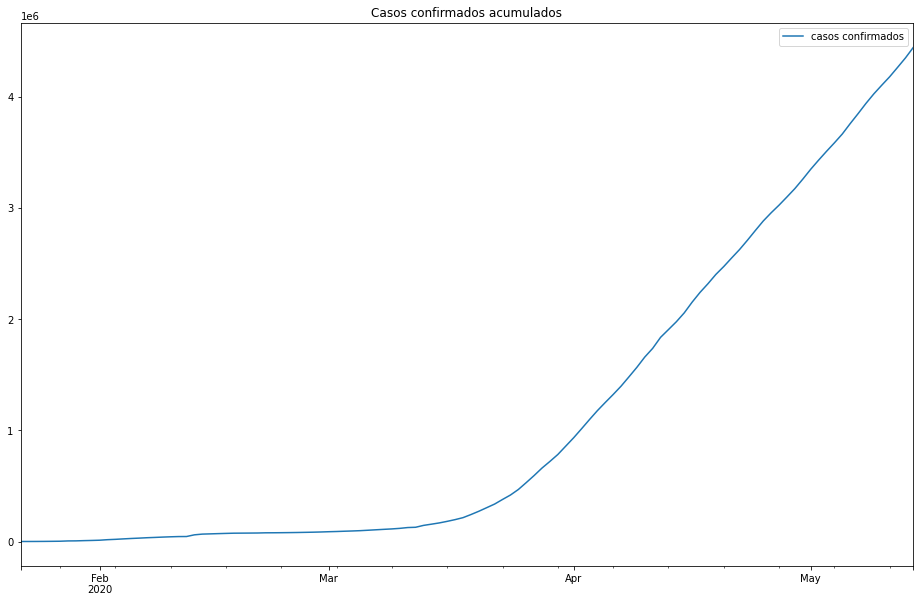

In [0]:
porRegiones_dfm.plot.line(figsize=(16,10)).legend(["casos confirmados"])
#plt.plot(porRegiones_dfm)
plt.title('Casos confirmados acumulados')
plt.show()

In [0]:
#Visualizacion de muertes acumuladas en el tiempo#
porMuertes = dfm_death.select(dfm_death.columns[4:]).groupby().sum()
porMuertes_dfm = porMuertes.toPandas()
#porRegionesMuertes_dfm.head()
porMuertes_dfm.columns = dfm_death.columns[4:]
porMuertes_dfm = porMuertes_dfm.T
porMuertes_dfm.index = pd.to_datetime(porMuertes_dfm.index)

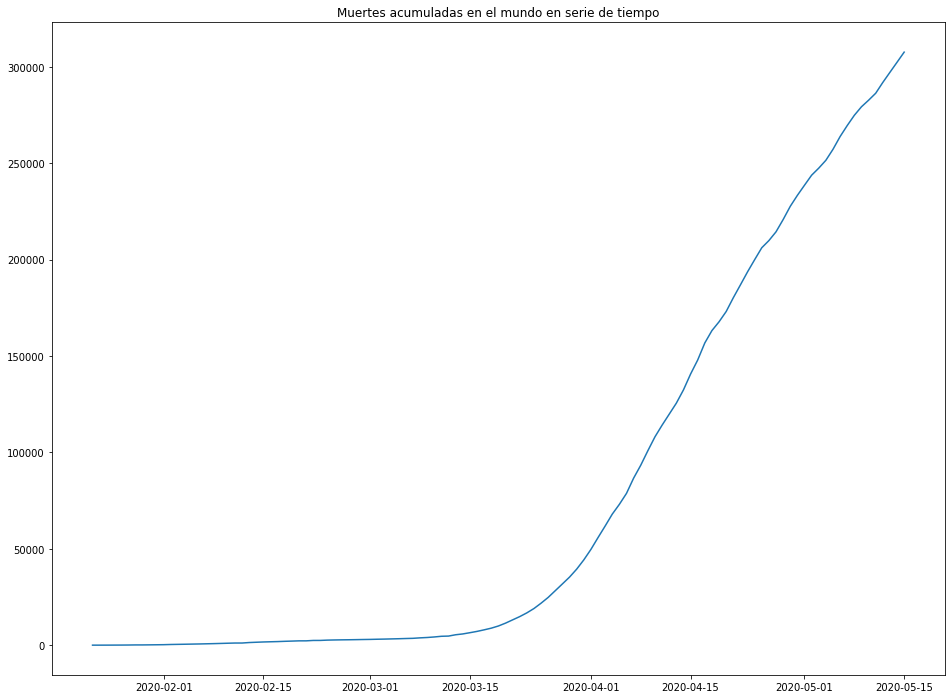

In [0]:
plt.figure(1, figsize=(16,12))
plt.plot(porMuertes_dfm)
plt.title('Muertes acumuladas en el mundo en serie de tiempo')
plt.show()

In [0]:
#Visualizacion de casos recuperados en serie de tiempo#
porRecuperacion = dfm_recovered.select(dfm_recovered.columns[4:]).groupby().sum()
porRecuperacion_dfm= porRecuperacion.toPandas()
#porRecuperacion_dfm.head()
porRecuperacion_dfm.columns = dfm_recovered.columns[4:]
porRecuperacion_dfm = porRecuperacion_dfm.T
porRecuperacion_dfm.index = pd.to_datetime(porRecuperacion_dfm.index)

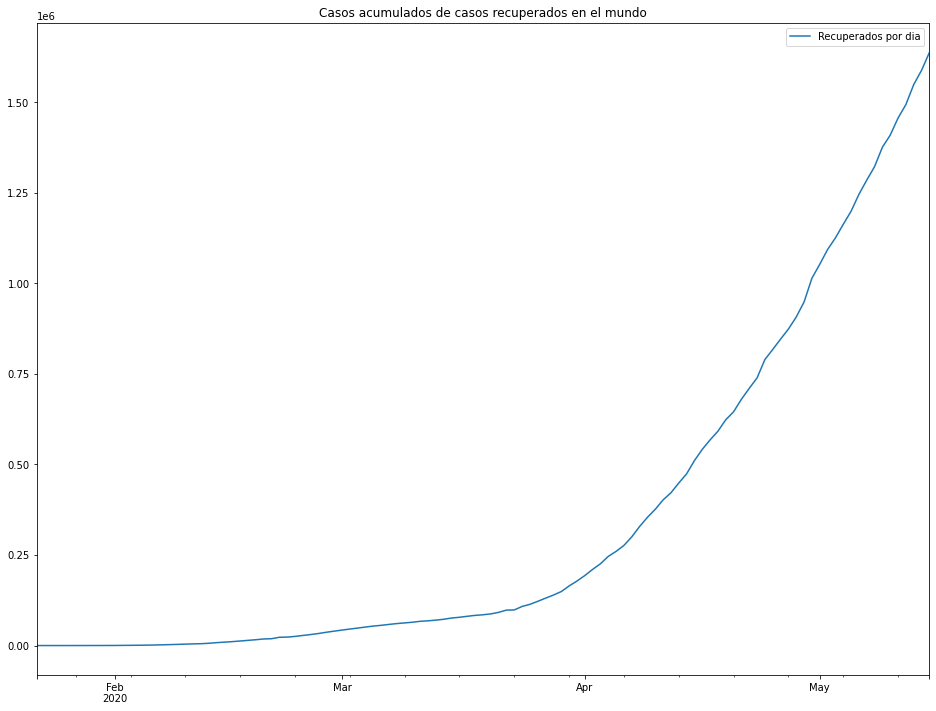

In [0]:
porRecuperacion_dfm.plot.line(figsize=(16,12)).legend(["Recuperados por dia"])
#plt.plot(porRegiones_dfm)
plt.title('Casos acumulados de casos recuperados en el mundo')
plt.show()

In [0]:
# Numero de casos por dia en cada continente  #
dfm_2 = dfm.toPandas()
dfm_3 = dfm_2.groupby('Region Name')['1/22/20',
 '1/23/20',
 '1/24/20',
 '1/25/20',
 '1/26/20',
 '1/27/20',
 '1/28/20',
 '1/29/20',
 '1/30/20',
 '1/31/20',
 '2/1/20',
 '2/2/20',
 '2/3/20',
 '2/4/20',
 '2/5/20',
 '2/6/20',
 '2/7/20',
 '2/8/20',
 '2/9/20',
 '2/10/20',
 '2/11/20',
 '2/12/20',
 '2/13/20',
 '2/14/20',
 '2/15/20',
 '2/16/20',
 '2/17/20',
 '2/18/20',
 '2/19/20',
 '2/20/20',
 '2/21/20',
 '2/22/20',
 '2/23/20',
 '2/24/20',
 '2/25/20',
 '2/26/20',
 '2/27/20',
 '2/28/20',
 '2/29/20',
 '3/1/20',
 '3/2/20',
 '3/3/20',
 '3/4/20',
 '3/5/20',
 '3/6/20',
 '3/7/20',
 '3/8/20',
 '3/9/20',
 '3/10/20',
 '3/11/20',
 '3/12/20',
 '3/13/20',
 '3/14/20',
 '3/15/20',
 '3/16/20',
 '3/17/20',
 '3/18/20',
 '3/19/20',
 '3/20/20',
 '3/21/20',
 '3/22/20',
 '3/23/20',
 '3/24/20',
 '3/25/20',
 '3/26/20',
 '3/27/20',
 '3/28/20',
 '3/29/20',
 '3/30/20',
 '3/31/20',
 '4/1/20',
 '4/2/20',
 '4/3/20',
 '4/4/20',
 '4/5/20',
 '4/6/20',
 '4/7/20',
 '4/8/20',
 '4/9/20',
 '4/10/20',
 '4/11/20',
 '4/12/20',
 '4/13/20',
 '4/14/20',
 '4/15/20',
 '4/16/20',
 '4/17/20',
 '4/18/20',
 '4/19/20',
 '4/20/20',
 '4/21/20',
 '4/22/20',
 '4/23/20',
 '4/24/20',
 '4/25/20',
 '4/26/20',
 '4/27/20',
 '4/28/20',
 '4/29/20',
 '4/30/20',
 '5/1/20',
 '5/2/20',
 '5/3/20',
 '5/4/20',
 '5/5/20',
 '5/6/20',
 '5/7/20',
 '5/8/20',
 '5/9/20',
 '5/10/20',
 '5/11/20',
 '5/12/20',
 '5/13/20',
 '5/14/20'].sum()
 
dfm_3 = dfm_3.drop(['#region+main+name'])
dfm_3

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:116: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.


,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,...,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,5/1/20,5/2/20,5/3/20,5/4/20,5/5/20,5/6/20,5/7/20,5/8/20,5/9/20,5/10/20,5/11/20,5/12/20,5/13/20,5/14/20
Region Name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Africa,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,3.0,3.0,4.0,...,9793.0,10499.0,11165.0,11969.0,12799.0,13490.0,14215.0,15082.0,15879.0,16852.0,17806.0,18993.0,20420.0,21739.0,22966.0,24139.0,25236.0,26653.0,28105.0,29840.0,31102.0,32657.0,33992.0,35678.0,37693.0,39785.0,41537.0,43734.0,45380.0,48075.0,50166.0,52713.0,55320.0,59124.0,61985.0,64752.0,67778.0,70985.0,73973.0,77002.0
Americas,1.0,1.0,2.0,2.0,6.0,6.0,7.0,7.0,7.0,11.0,12.0,12.0,15.0,15.0,16.0,16.0,18.0,18.0,18.0,18.0,19.0,19.0,20.0,20.0,20.0,20.0,21.0,21.0,21.0,21.0,24.0,24.0,24.0,61.0,62.0,69.0,72.0,76.0,94.0,112.0,...,385661.0,418703.0,454394.0,493110.0,533814.0,575419.0,610222.0,644033.0,675628.0,707764.0,743867.0,782957.0,823715.0,864034.0,897740.0,930657.0,965809.0,1003525.0,1043270.0,1100333.0,1146161.0,1183756.0,1216077.0,1253858.0,1295325.0,1340997.0,1390733.0,1434039.0,1476110.0,1514068.0,1554147.0,1599528.0,1645237.0,1691746.0,1736225.0,1771764.0,1804293.0,1845044.0,1890016.0,1942924.0
Asia,554.0,653.0,937.0,1429.0,2105.0,2912.0,5558.0,6143.0,8208.0,9889.0,11991.0,16738.0,19827.0,23836.0,27578.0,30736.0,34266.0,36990.0,40015.0,42551.0,44588.0,44966.0,60112.0,66585.0,68662.0,70786.0,72720.0,74510.0,74934.0,75479.0,76081.0,77792.0,78028.0,78516.0,79255.0,80056.0,81147.0,82218.0,83717.0,85317.0,...,223200.0,233846.0,243327.0,252900.0,263216.0,274563.0,286456.0,298127.0,309955.0,321086.0,332538.0,345284.0,358089.0,370035.0,383036.0,395536.0,409764.0,421710.0,435287.0,448428.0,460694.0,472279.0,483784.0,494804.0,507335.0,520415.0,533869.0,545906.0,558816.0,572842.0,587195.0,603929.0,618517.0,634849.0,650932.0,668791.0,684880.0,703226.0,720947.0,739025.0
Europe,0.0,0.0,2.0,3.0,3.0,4.0,8.0,10.0,10.0,18.0,23.0,25.0,27.0,28.0,28.0,28.0,31.0,36.0,38.0,43.0,45.0,46.0,46.0,46.0,47.0,47.0,47.0,47.0,47.0,47.0,64.0,106.0,199.0,277.0,381.0,541.0,805.0,1094.0,1466.0,2203.0,...,623557.0,650675.0,679681.0,714213.0,747559.0,786159.0,816703.0,869435.0,895173.0,921258.0,952562.0,995864.0,1028648.0,1052614.0,1088173.0,1112499.0,1139314.0,1163782.0,1192788.0,1208157.0,1234184.0,1257323.0,1280841.0,1303835.0,1322870.0,1346632.0,1370319.0,1394782.0,1417277.0,1438900.0,1461981.0,1490677.0,1517402.0,1543096.0,1565595.0,1587108.0,1611245.0,1633176.0,1652757.0,1673856.0
Oceania,0.0,0.0,0.0,0.0,4.0,5.0,5.0,6.0,9.0,9.0,12.0,12.0,12.0,13.0,13.0,14.0,15.0,15.0,15.0,15.0,15.0,15.0,15.0,15.0,15.0,15.0,15.0,15.0,15.0,15.0,15.0,15.0,15.0,15.0,15.0,15.0,15.0,16.0,26.0,28.0,...,6798.0,6979.0,7137.0,7306.0,7433.0,7585.0,7702.0,7734.0,7791.0,7872.0,7917.0,7960.0,8028.0,8087.0,8138.0,8162.0,8189.0,8204.0,8219.0,8239.0,8265.0,8284.0,8294.0,8320.0,8330.0,8347.0,8365.0,8388.0,8411.0,8435.0,8467.0,8487.0,8507.0,8514.0,8537.0,8549.0,8571.0,8581.0,8590.0,8621.0


In [0]:
# Numero de casos de muerte por dia en cada continente  #
dfm_region_d = dfm_death_iso.toPandas()
dfm_region_d = dfm_region_d.groupby('Region Name')['1/22/20',
 '1/23/20',
 '1/24/20',
 '1/25/20',
 '1/26/20',
 '1/27/20',
 '1/28/20',
 '1/29/20',
 '1/30/20',
 '1/31/20',
 '2/1/20',
 '2/2/20',
 '2/3/20',
 '2/4/20',
 '2/5/20',
 '2/6/20',
 '2/7/20',
 '2/8/20',
 '2/9/20',
 '2/10/20',
 '2/11/20',
 '2/12/20',
 '2/13/20',
 '2/14/20',
 '2/15/20',
 '2/16/20',
 '2/17/20',
 '2/18/20',
 '2/19/20',
 '2/20/20',
 '2/21/20',
 '2/22/20',
 '2/23/20',
 '2/24/20',
 '2/25/20',
 '2/26/20',
 '2/27/20',
 '2/28/20',
 '2/29/20',
 '3/1/20',
 '3/2/20',
 '3/3/20',
 '3/4/20',
 '3/5/20',
 '3/6/20',
 '3/7/20',
 '3/8/20',
 '3/9/20',
 '3/10/20',
 '3/11/20',
 '3/12/20',
 '3/13/20',
 '3/14/20',
 '3/15/20',
 '3/16/20',
 '3/17/20',
 '3/18/20',
 '3/19/20',
 '3/20/20',
 '3/21/20',
 '3/22/20',
 '3/23/20',
 '3/24/20',
 '3/25/20',
 '3/26/20',
 '3/27/20',
 '3/28/20',
 '3/29/20',
 '3/30/20',
 '3/31/20',
 '4/1/20',
 '4/2/20',
 '4/3/20',
 '4/4/20',
 '4/5/20',
 '4/6/20',
 '4/7/20',
 '4/8/20',
 '4/9/20',
 '4/10/20',
 '4/11/20',
 '4/12/20',
 '4/13/20',
 '4/14/20',
 '4/15/20',
 '4/16/20',
 '4/17/20',
 '4/18/20',
 '4/19/20',
 '4/20/20',
 '4/21/20',
 '4/22/20',
 '4/23/20',
 '4/24/20',
 '4/25/20',
 '4/26/20',
 '4/27/20',
 '4/28/20',
 '4/29/20',
 '4/30/20',
 '5/1/20',
 '5/2/20',
 '5/3/20',
 '5/4/20',
 '5/5/20',
 '5/6/20',
 '5/7/20',
 '5/8/20',
 '5/9/20',
 '5/10/20',
 '5/11/20',
 '5/12/20',
 '5/13/20',
 '5/14/20'].sum()
 
dfm_region_d = dfm_region_d.drop(['#region+main+name'])
dfm_region_d

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:116: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.


,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,...,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,5/1/20,5/2/20,5/3/20,5/4/20,5/5/20,5/6/20,5/7/20,5/8/20,5/9/20,5/10/20,5/11/20,5/12/20,5/13/20,5/14/20
Region Name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Africa,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,446.0,489.0,535.0,576.0,629.0,695.0,745.0,791.0,837.0,876.0,913.0,968.0,1020.0,1062.0,1125.0,1163.0,1193.0,1244.0,1301.0,1328.0,1379.0,1427.0,1466.0,1527.0,1592.0,1638.0,1696.0,1763.0,1802.0,1848.0,1917.0,2015.0,2083.0,2164.0,2232.0,2301.0,2355.0,2407.0,2507.0,2578.0
Americas,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,13822.0,15594.0,18121.0,20507.0,22844.0,25224.0,27517.0,29549.0,31618.0,34482.0,37389.0,40046.0,43102.0,45936.0,47567.0,49712.0,52732.0,55624.0,58748.0,61336.0,64318.0,65912.0,67982.0,71201.0,74731.0,77733.0,80718.0,83177.0,85324.0,87341.0,90642.0,94259.0,97695.0,100596.0,103338.0,105356.0,107425.0,110784.0,113935.0,117104.0
Asia,17.0,18.0,26.0,42.0,56.0,82.0,131.0,133.0,171.0,213.0,259.0,362.0,426.0,492.0,564.0,634.0,719.0,806.0,906.0,1013.0,1113.0,1118.0,1371.0,1523.0,1665.0,1769.0,1867.0,2006.0,2121.0,2244.0,2247.0,2453.0,2462.0,2618.0,2694.0,2752.0,2791.0,2843.0,2903.0,2952.0,...,8609.0,8931.0,9226.0,9527.0,9890.0,10221.0,10588.0,10987.0,11331.0,11721.0,12019.0,12414.0,14066.0,14401.0,14785.0,15104.0,15489.0,15834.0,16212.0,16602.0,16953.0,17245.0,17589.0,17912.0,18278.0,18635.0,18963.0,19342.0,19619.0,20080.0,20451.0,20827.0,21205.0,21501.0,21851.0,22189.0,22501.0,22865.0,23260.0,23592.0
Europe,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,3.0,4.0,8.0,11.0,14.0,19.0,23.0,31.0,36.0,...,50150.0,53698.0,58720.0,62679.0,67453.0,71903.0,75221.0,78448.0,81695.0,85274.0,90251.0,94431.0,98523.0,101721.0,104200.0,107023.0,110726.0,114113.0,117296.0,120618.0,123423.0,125198.0,127289.0,130037.0,132938.0,135226.0,137113.0,139401.0,140594.0,142136.0,144095.0,146620.0,148450.0,150503.0,151756.0,152729.0,153915.0,155751.0,157360.0,159009.0
Oceania,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,36.0,41.0,46.0,51.0,52.0,56.0,61.0,64.0,66.0,71.0,72.0,72.0,77.0,78.0,79.0,79.0,80.0,81.0,92.0,97.0,98.0,102.0,102.0,108.0,110.0,112.0,113.0,114.0,115.0,116.0,118.0,118.0,118.0,118.0,118.0,118.0,118.0,119.0,119.0,119.0


In [0]:
# Numero de casos de Recuperados por dia en cada continente  #
dfm_region_recovered = dfm_recovered_iso.toPandas()
dfm_region_recovered = dfm_region_recovered.groupby('Region Name')['1/22/20',
 '1/23/20',
 '1/24/20',
 '1/25/20',
 '1/26/20',
 '1/27/20',
 '1/28/20',
 '1/29/20',
 '1/30/20',
 '1/31/20',
 '2/1/20',
 '2/2/20',
 '2/3/20',
 '2/4/20',
 '2/5/20',
 '2/6/20',
 '2/7/20',
 '2/8/20',
 '2/9/20',
 '2/10/20',
 '2/11/20',
 '2/12/20',
 '2/13/20',
 '2/14/20',
 '2/15/20',
 '2/16/20',
 '2/17/20',
 '2/18/20',
 '2/19/20',
 '2/20/20',
 '2/21/20',
 '2/22/20',
 '2/23/20',
 '2/24/20',
 '2/25/20',
 '2/26/20',
 '2/27/20',
 '2/28/20',
 '2/29/20',
 '3/1/20',
 '3/2/20',
 '3/3/20',
 '3/4/20',
 '3/5/20',
 '3/6/20',
 '3/7/20',
 '3/8/20',
 '3/9/20',
 '3/10/20',
 '3/11/20',
 '3/12/20',
 '3/13/20',
 '3/14/20',
 '3/15/20',
 '3/16/20',
 '3/17/20',
 '3/18/20',
 '3/19/20',
 '3/20/20',
 '3/21/20',
 '3/22/20',
 '3/23/20',
 '3/24/20',
 '3/25/20',
 '3/26/20',
 '3/27/20',
 '3/28/20',
 '3/29/20',
 '3/30/20',
 '3/31/20',
 '4/1/20',
 '4/2/20',
 '4/3/20',
 '4/4/20',
 '4/5/20',
 '4/6/20',
 '4/7/20',
 '4/8/20',
 '4/9/20',
 '4/10/20',
 '4/11/20',
 '4/12/20',
 '4/13/20',
 '4/14/20',
 '4/15/20',
 '4/16/20',
 '4/17/20',
 '4/18/20',
 '4/19/20',
 '4/20/20',
 '4/21/20',
 '4/22/20',
 '4/23/20',
 '4/24/20',
 '4/25/20',
 '4/26/20',
 '4/27/20',
 '4/28/20',
 '4/29/20',
 '4/30/20',
 '5/1/20',
 '5/2/20',
 '5/3/20',
 '5/4/20',
 '5/5/20',
 '5/6/20',
 '5/7/20',
 '5/8/20',
 '5/9/20',
 '5/10/20',
 '5/11/20',
 '5/12/20',
 '5/13/20',
 '5/14/20'].sum()
 
dfm_region_recovered = dfm_region_recovered.drop(['#region+main+name'])
dfm_region_recovered

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:116: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.


,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,...,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,5/1/20,5/2/20,5/3/20,5/4/20,5/5/20,5/6/20,5/7/20,5/8/20,5/9/20,5/10/20,5/11/20,5/12/20,5/13/20,5/14/20
Region Name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Africa,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,...,960.0,1047.0,1219.0,1467.0,1686.0,2229.0,2457.0,2922.0,3034.0,3338.0,3762.0,4585.0,4958.0,5338.0,5840.0,6424.0,6739.0,7315.0,8534.0,9134.0,9530.0,10018.0,10575.0,11868.0,12630.0,13078.0,13925.0,14664.0,15137.0,16231.0,16977.0,18286.0,19099.0,19839.0,21649.0,22683.0,23989.0,24819.0,26250.0,28186.0
Americas,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,3.0,3.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,8.0,8.0,8.0,8.0,9.0,9.0,12.0,13.0,13.0,13.0,...,23703.0,26328.0,29621.0,32206.0,35728.0,40396.0,44284.0,48200.0,60855.0,69355.0,86474.0,93454.0,99172.0,106795.0,122502.0,126061.0,131107.0,137793.0,143326.0,164850.0,174039.0,184688.0,193503.0,204235.0,213341.0,250736.0,267167.0,284954.0,297056.0,309886.0,321280.0,329745.0,341796.0,354929.0,379417.0,389421.0,412592.0,422695.0,446395.0,455101.0
Asia,28.0,30.0,36.0,39.0,52.0,61.0,107.0,126.0,141.0,220.0,282.0,470.0,621.0,850.0,1122.0,1485.0,2009.0,2614.0,3239.0,3941.0,4678.0,5138.0,6276.0,8039.0,9372.0,10835.0,12550.0,14308.0,16076.0,18132.0,18838.0,22833.0,23341.0,25175.0,27845.0,30311.0,33158.0,36589.0,39659.0,42556.0,...,110646.0,116627.0,120784.0,124779.0,128934.0,133977.0,142464.0,146497.0,150560.0,155687.0,159953.0,165713.0,170136.0,176091.0,180620.0,186204.0,191959.0,198594.0,205339.0,212948.0,220763.0,228210.0,236746.0,246047.0,256106.0,265787.0,275826.0,284418.0,295180.0,305230.0,316293.0,327424.0,338742.0,349240.0,359424.0,371721.0,382707.0,394790.0,406855.0,418459.0
Europe,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,7.0,7.0,11.0,18.0,19.0,30.0,30.0,30.0,32.0,33.0,34.0,33.0,40.0,43.0,86.0,87.0,88.0,125.0,...,123181.0,130656.0,146489.0,168269.0,185232.0,196716.0,210067.0,221206.0,231251.0,242146.0,256773.0,274070.0,288217.0,297844.0,308648.0,320673.0,343716.0,359672.0,374933.0,395686.0,405842.0,415633.0,425334.0,437188.0,458668.0,476567.0,487734.0,501294.0,510011.0,523451.0,536253.0,561856.0,576938.0,589811.0,606881.0,616855.0,628563.0,642689.0,660590.0,677642.0
Oceania,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,8.0,8.0,8.0,8.0,10.0,10.0,10.0,10.0,11.0,11.0,11.0,11.0,11.0,11.0,11.0,11.0,11.0,11.0,...,914.0,1257.0,1322.0,1363.0,1790.0,2167.0,2229.0,2278.0,2353.0,2815.0,2915.0,3126.0,4638.0,5007.0,5053.0,5302.0,5740.0,6028.0,6203.0,6322.0,6586.0,6791.0,6874.0,6972.0,7035.0,7073.0,7118.0,7162.0,7207.0,7281.0,7384.0,7457.0,7521.0,7586.0,7608.0,7649.0,7707.0,7770.0,7806.0,7854.0


In [0]:
# Numero de casos confirmados por continente#
dfm_porRegion = dfm.toPandas()
dfm_porRegion_2 = dfm_porRegion.groupby('Region Name')['5/14/20'].sum()
 
dfm_porRegion_2 = dfm_porRegion_2.drop(['#region+main+name'])
dfm_porRegion_2

Region Name
Africa        77002.0
Americas    1942924.0
Asia         739025.0
Europe      1673856.0
Oceania        8621.0
Name: 5/14/20, dtype: float64

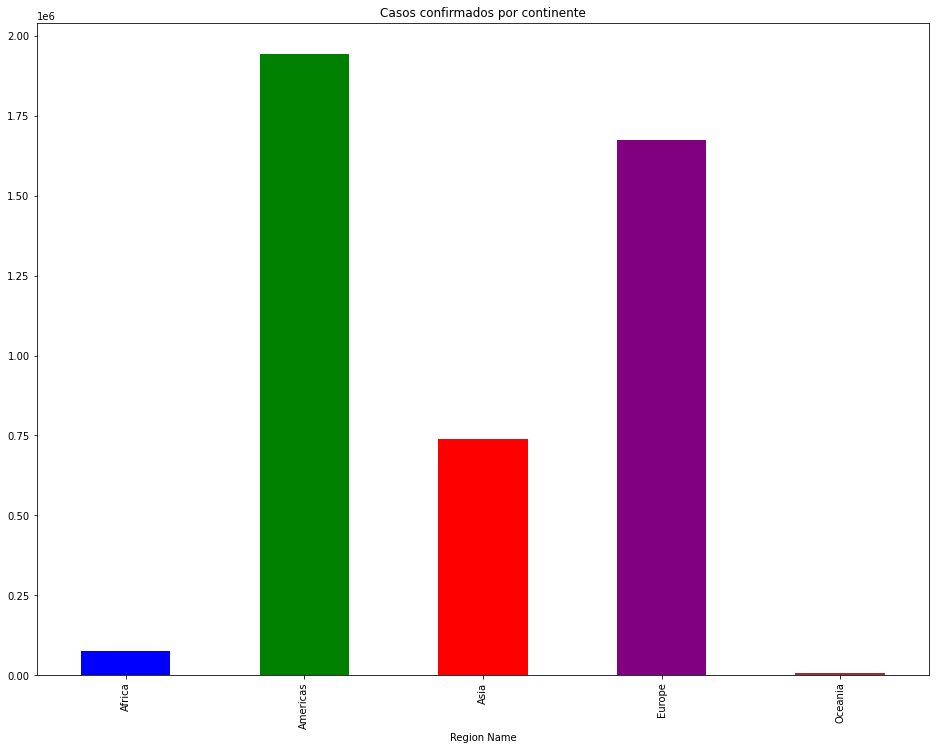

In [0]:
dfm_porRegion_2.plot.bar(figsize = (16, 12), color = ('blue','g','r','purple','brown'))
plt.title("Casos confirmados por continente")
plt.show()

In [0]:
# Numero de casos de muerte por continente#
dfm_porRegion_d2 = dfm_death_iso.toPandas()
dfm_porRegion_d2 = dfm_porRegion_d2.groupby('Region Name')['5/14/20'].sum()
dfm_porRegion_d2 = dfm_porRegion_d2.drop(['#region+main+name'])
dfm_porRegion_d2

Region Name
Africa        2578.0
Americas    117104.0
Asia         23592.0
Europe      159009.0
Oceania        119.0
Name: 5/14/20, dtype: float64

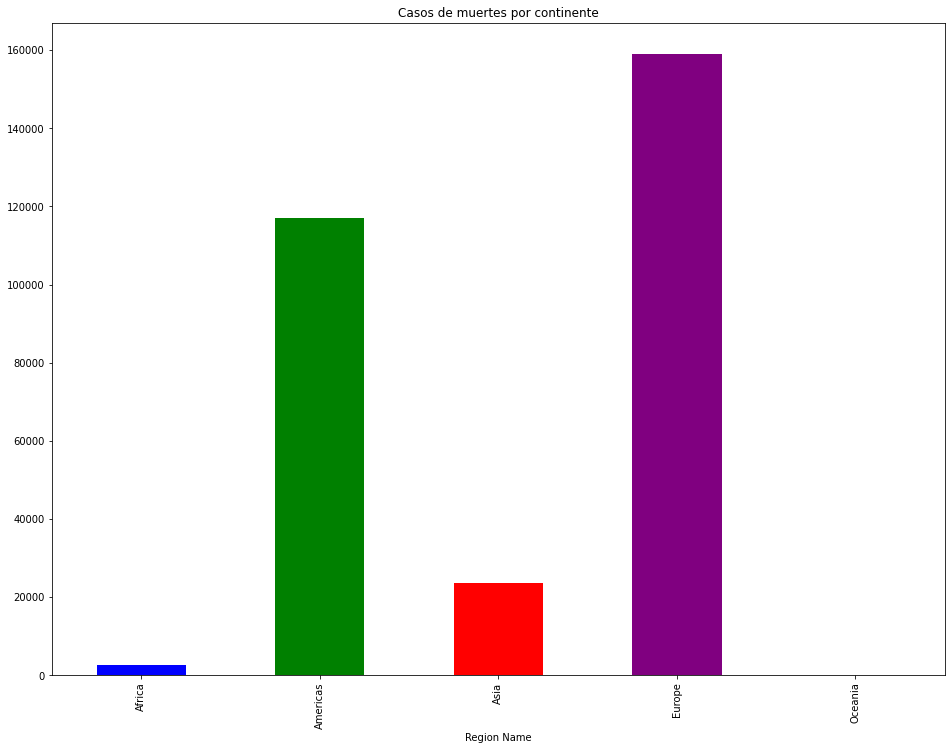

In [0]:
dfm_porRegion_d2.plot.bar(figsize = (16, 12), color = ('blue','g','r','purple','brown'))
plt.title("Casos de muertes por continente")
plt.show()

In [0]:
# Numero de casos de recuperados por continente#
dfm_porRegion_re = dfm_recovered_iso.toPandas()
dfm_porRegion_re = dfm_porRegion_re.groupby('Region Name')['5/14/20'].sum()
 
dfm_porRegion_re = dfm_porRegion_re.drop(['#region+main+name'])
dfm_porRegion_re

Region Name
Africa       28186.0
Americas    455101.0
Asia        418459.0
Europe      677642.0
Oceania       7854.0
Name: 5/14/20, dtype: float64

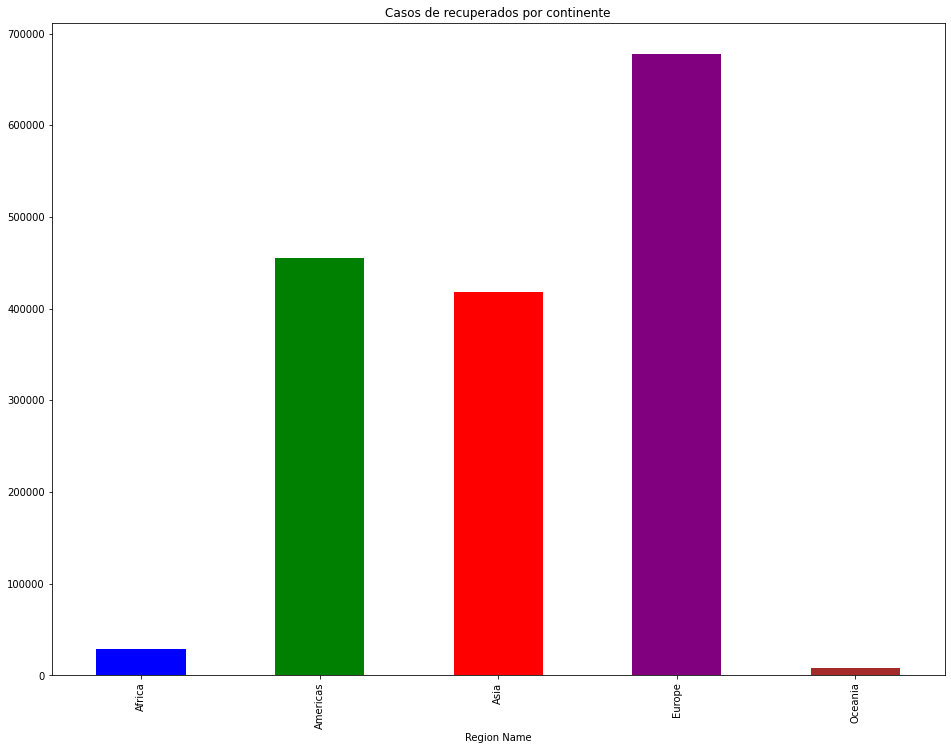

In [0]:
dfm_porRegion_re.plot.bar(figsize = (16, 12), color = ('blue','g','r','purple','brown'))
plt.title("Casos de recuperados por continente")
plt.show()

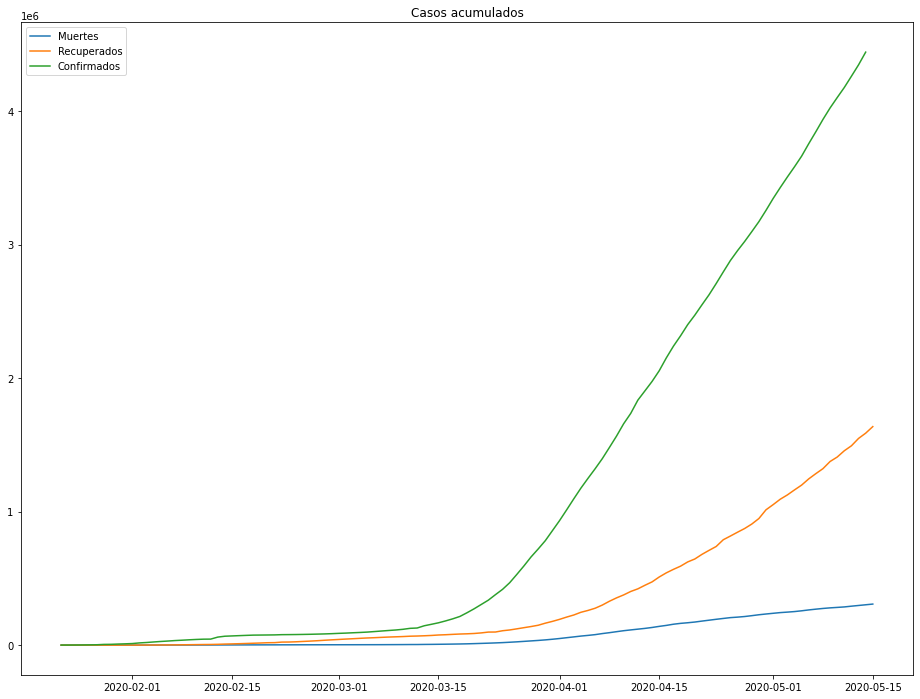

In [0]:
# Comparacion de las variables: recuperados, muertes, casos confirmados#
plt.figure(2, figsize =(16, 12))
plt.plot(porMuertes_dfm, label = "Muertes")
plt.plot(porRecuperacion_dfm, label = "Recuperados")
plt.plot(porRegiones_dfm, label = "Confirmados")
plt.title('Casos acumulados')
plt.legend(loc='upper left')
plt.show()

In [0]:
dfm_narrow_filter= dfm_narrow.filter(dfm_narrow['Value']> 100000).filter(dfm_narrow['Date'] == '2020-05-16').select('Country/Region','Value')
dfm_narrow_pandas = dfm_narrow_filter.toPandas()
#dfm_narrow_pandas = dfm_narrow_pandas['Country/Region'].astype(str)
dfm_narrow_pandas['Value'] = dfm_narrow_pandas['Value'].astype(str).astype(int)
dfm_narrow_pandas = dfm_narrow_pandas.set_index('Country/Region')
dfm_narrow_pandas

,Value
Country/Region,
Brazil,233511
France,177207
Germany,175752
Iran,118392
Italy,224760
Russia,272043
Spain,230698
Turkey,148067
United Kingdom,240161


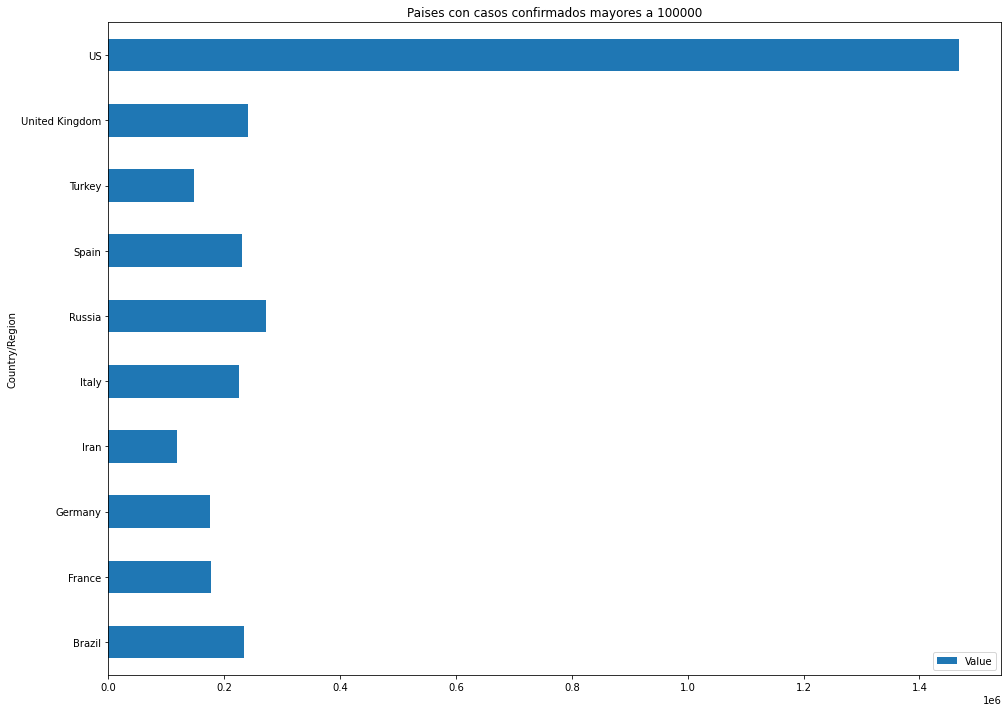

In [0]:
dfm_narrow_pandas.plot.barh(figsize = (16,12))
plt.title("Paises con casos confirmados mayores a 100000")
plt.show()

**Análisis de Colombia.**

In [0]:
#Miramos variables inportantes como el número de registros, promedios, etc.
dfc.describe().show()

+-------+------------------+---------------------+------------------+-------------------+------------------------+--------------------+--------------------+--------------------+-----------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+
|summary|        ID de caso|Fecha de notificación|   Codigo DIVIPOLA|Ciudad de ubicación|Departamento o Distrito |            atención|                Edad|                Sexo|       Tipo|              Estado| País de procedencia|                 FIS|     Fecha de muerte|   Fecha diagnostico|    Fecha recuperado|   fecha reporte web|
+-------+------------------+---------------------+------------------+-------------------+------------------------+--------------------+--------------------+--------------------+-----------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+-----------

In [0]:
dfc.head(10)

[Row(ID de caso='#meta+id', Fecha de notificación='#date+notification', Codigo DIVIPOLA='#code', Ciudad de ubicación='#adm3+name', Departamento o Distrito ='#adm2+name', atención='#indicator+infected+type', Edad='#indicator+infected+age', Sexo='#indicator+infected+sex', Tipo=None, Estado='#indicator+infected+status', País de procedencia='#indicator+infected+origin', FIS=None, Fecha de muerte='#date+reported+death', Fecha diagnostico='#date+reported+notification', Fecha recuperado='#date+reported+recovered', fecha reporte web='#date+reported'),
 Row(ID de caso='1', Fecha de notificación='2020-03-02T00:00:00.000', Codigo DIVIPOLA='11001', Ciudad de ubicación='Bogotá D.C.', Departamento o Distrito ='Bogotá D.C.', atención='Recuperado', Edad='19', Sexo='F', Tipo='Importado', Estado='Recuperado', País de procedencia='Italia', FIS='2020-02-27T00:00:00.000', Fecha de muerte='-   -', Fecha diagnostico='2020-03-06T00:00:00.000', Fecha recuperado='2020-03-13T00:00:00.000', fecha reporte web='202

In [0]:
#Eliminamos los datos con los que no vamos a trabajar
dfc_data = dfc.drop('Fecha de notificación','Codigo DIVIPOLA', 'FIS', 'fecha reporte web')

**Ánalisis por ciudades**

In [0]:
#Agrupamos por ciudad los casos y acondicionamos para pandas
dfc_by_ciudad = dfc_data.groupBy('Ciudad de ubicación').count().orderBy('count', ascending=False)
dfc_by_ciudad.show(10)

ciudad_pandas = dfc_by_ciudad.toPandas()[:5]
ciudad_pandas.set_index("Ciudad de ubicación", inplace = True)


+--------------------+-----+
| Ciudad de ubicación|count|
+--------------------+-----+
|         Bogotá D.C.| 4892|
|                Cali| 1237|
| Cartagena de Indias|  982|
|             Leticia|  923|
|       Villavicencio|  912|
|        Barranquilla|  693|
|             Soledad|  417|
|            Medellín|  329|
|         Santa Marta|  221|
|San Andrés de Tumaco|  198|
+--------------------+-----+
only showing top 10 rows



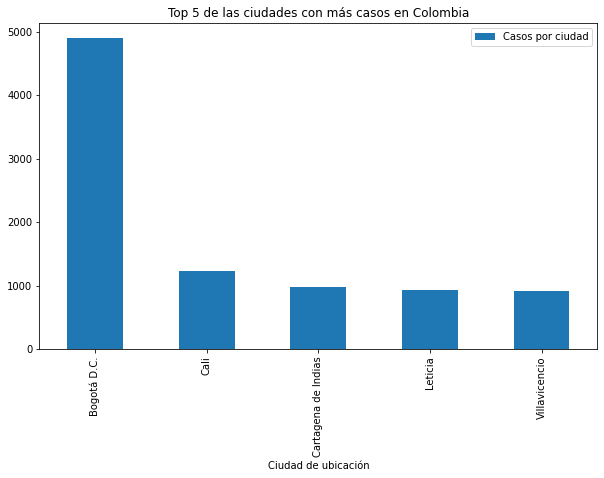

In [0]:
#Graficamos las 5 ciudades más contaminadas
ciudad_pandas.plot.bar(figsize=(10,6)).legend(["Casos por ciudad"])
plt.title('Top 5 de las ciudades con más casos en Colombia')
plt.show()

In [0]:
#Agrupamos por ciudad las muertes y acondicionamos para pandas

dfc_by_death= dfc_data.filter(dfc_data['Fecha de muerte']!='-   -').groupBy('Ciudad de ubicación').count().orderBy('count', ascending=False)
dfc_by_death.show(10)

ciudad_muertes_pandas = dfc_by_death.toPandas()[:5]
ciudad_muertes_pandas.set_index("Ciudad de ubicación", inplace = True)


+--------------------+-----+
| Ciudad de ubicación|count|
+--------------------+-----+
|         Bogotá D.C.|  165|
|                Cali|   67|
| Cartagena de Indias|   56|
|             Leticia|   29|
|        Barranquilla|   24|
|         Santa Marta|   17|
|             Soledad|   11|
|San Andrés de Tumaco|   10|
|              Cúcuta|    8|
|             Pereira|    7|
+--------------------+-----+
only showing top 10 rows



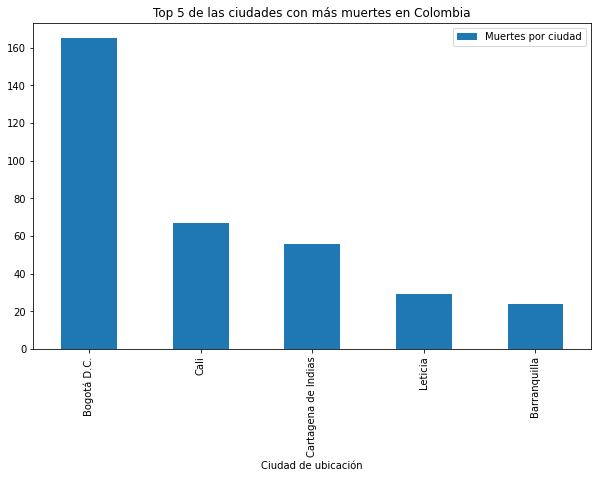

In [0]:
#Graficamos las 5 ciudades con más muertes
ciudad_muertes_pandas.plot.bar(figsize=(10,6)).legend(["Muertes por ciudad"])
plt.title('Top 5 de las ciudades con más muertes en Colombia')
plt.show()

**Analisamos por hombres y mujeres jóvenes**

In [0]:
#Miramos los casos femeninos
dfc_data.filter(((dfc_data['Sexo']=='F')|(dfc_data['Sexo']=='f'))&(dfc_data['Edad']>=15)&(dfc_data['Edad']<=40)).show(10)

+----------+-------------------+------------------------+----------+----+----+-----------+----------+-------------------+---------------+--------------------+--------------------+
|ID de caso|Ciudad de ubicación|Departamento o Distrito |  atención|Edad|Sexo|       Tipo|    Estado|País de procedencia|Fecha de muerte|   Fecha diagnostico|    Fecha recuperado|
+----------+-------------------+------------------------+----------+----+----+-----------+----------+-------------------+---------------+--------------------+--------------------+
|         1|        Bogotá D.C.|             Bogotá D.C.|Recuperado|  19|   F|  Importado|Recuperado|             Italia|          -   -|2020-03-06T00:00:...|2020-03-13T00:00:...|
|         6|             Itagüí|               Antioquia|Recuperado|  27|   F|Relacionado|Recuperado|           Colombia|          -   -|2020-03-11T00:00:...|2020-03-26T00:00:...|
|         8|        Bogotá D.C.|             Bogotá D.C.|Recuperado|  22|   F|  Importado|Recuperado

In [0]:
#Miramos los casos masculinos
dfc_data.filter(((dfc_data['Sexo']=='M')|(dfc_data['Sexo']=='m'))&(dfc_data['Edad']>=15)&(dfc_data['Edad']<=40)).show(10)

+----------+-------------------+------------------------+----------+----+----+-----------+----------+--------------------+---------------+--------------------+--------------------+
|ID de caso|Ciudad de ubicación|Departamento o Distrito |  atención|Edad|Sexo|       Tipo|    Estado| País de procedencia|Fecha de muerte|   Fecha diagnostico|    Fecha recuperado|
+----------+-------------------+------------------------+----------+----+----+-----------+----------+--------------------+---------------+--------------------+--------------------+
|         2|Guadalajara de Buga|         Valle del Cauca|Recuperado|  34|   M|  Importado|Recuperado|              España|          -   -|2020-03-09T00:00:...|2020-03-19T00:00:...|
|         5|           Medellín|               Antioquia|Recuperado|  25|   M|Relacionado|Recuperado|            Colombia|          -   -|2020-03-11T00:00:...|2020-03-23T00:00:...|
|        21|           Medellín|               Antioquia|Recuperado|  28|   M|Relacionado|Recup

**Análisis por mujeres**

In [0]:
#Miramos el conteo de los casos de mujeres por ciudad.
dfc_data.filter((dfc_data['Sexo']=='F')|(dfc_data['Sexo']=='f')).groupBy('Ciudad de ubicación').count().orderBy('count', ascending=False).show(10)

+--------------------+-----+
| Ciudad de ubicación|count|
+--------------------+-----+
|         Bogotá D.C.| 2366|
|                Cali|  580|
| Cartagena de Indias|  445|
|             Leticia|  393|
|        Barranquilla|  294|
|             Soledad|  172|
|            Medellín|  169|
|         Santa Marta|  112|
|             Pereira|   92|
|San Andrés de Tumaco|   88|
+--------------------+-----+
only showing top 10 rows



In [0]:
#Filtrado por mujeres jóvenes y acondicionamos para pandas
dfc_by_mujeres= dfc_data.filter(((dfc_data['Sexo']=='F')|(dfc_data['Sexo']=='f'))&(dfc_data['Edad']>=15)&(dfc_data['Edad']<=40)).groupBy('Ciudad de ubicación').count().orderBy('count', ascending=False)
dfc_by_mujeres.show(10)

dfc_by_mujeres_pandas = dfc_by_mujeres.toPandas()
dfc_by_mujeres_pandas.set_index("Ciudad de ubicación", inplace = True)


+--------------------+-----+
| Ciudad de ubicación|count|
+--------------------+-----+
|         Bogotá D.C.| 1108|
|                Cali|  289|
| Cartagena de Indias|  209|
|             Leticia|  181|
|        Barranquilla|  128|
|            Medellín|  101|
|             Soledad|   85|
|         Santa Marta|   59|
|             Pereira|   56|
|San Andrés de Tumaco|   40|
+--------------------+-----+
only showing top 10 rows



In [0]:
#Mujeres jóvenes Recuperadas
dfc_recuperado_mujeres= dfc_data.filter(((dfc_data['Sexo']=='F')|(dfc_data['Sexo']=='f'))&(dfc_data['Edad']>=15)&(dfc_data['Edad']<=40)&(dfc_data['Estado']=='Recuperado')).groupBy('Ciudad de ubicación').count().orderBy('count', ascending=False)
dfc_recuperado_mujeres.show(10)

dfc_recuperado_mujeres_pandas = dfc_recuperado_mujeres.toPandas()
dfc_recuperado_mujeres_pandas.set_index("Ciudad de ubicación", inplace = True)

+-------------------+-----+
|Ciudad de ubicación|count|
+-------------------+-----+
|        Bogotá D.C.|  357|
|               Cali|  103|
|           Medellín|   66|
|            Pereira|   42|
|Cartagena de Indias|   36|
|       Barranquilla|   22|
|        Santa Marta|   21|
|       Dosquebradas|   15|
|             Soacha|   13|
|             Cúcuta|   11|
+-------------------+-----+
only showing top 10 rows



In [0]:
#Mostramos cuáles son las mujeres muertas pociudad.
dfc_data.filter(((dfc_data['Sexo']=='F')|(dfc_data['Sexo']=='f'))&(dfc_data['Fecha de muerte']!='-   -')).groupBy('Ciudad de ubicación').count().orderBy('count', ascending=False).show(10)

+--------------------+-----+
| Ciudad de ubicación|count|
+--------------------+-----+
|         Bogotá D.C.|   67|
| Cartagena de Indias|   24|
|                Cali|   23|
|        Barranquilla|   11|
|         Santa Marta|    7|
|             Leticia|    6|
|              Cúcuta|    5|
|             Soledad|    5|
|San Andrés de Tumaco|    4|
|             Palmira|    3|
+--------------------+-----+
only showing top 10 rows



In [0]:
#Mujeres jóvenes muertas
dfc_muerte_mujeres= dfc_data.filter(((dfc_data['Sexo']=='F')|(dfc_data['Sexo']=='f'))&(dfc_data['Edad']>=15)&(dfc_data['Edad']<=40)&(dfc_data['Fecha de muerte']!='-   -')).groupBy('Ciudad de ubicación').count().orderBy('count', ascending=False)
dfc_muerte_mujeres.show(10)

dfc_muerte_mujeres_pandas = dfc_muerte_mujeres.toPandas()
dfc_muerte_mujeres_pandas.set_index("Ciudad de ubicación", inplace = True)

+--------------------+-----+
| Ciudad de ubicación|count|
+--------------------+-----+
|         Bogotá D.C.|    5|
| Cartagena de Indias|    2|
|          San Martín|    1|
|Santander de Quil...|    1|
|       Villavicencio|    1|
|              Melgar|    1|
|         Santa Marta|    1|
+--------------------+-----+



In [0]:
ciudad_pandas = dfc_by_ciudad.toPandas()[:10]#necesario para traer todas lasciudades donde hay muertes jóvenes
ciudad_pandas.set_index("Ciudad de ubicación", inplace = True)
dfc_by_mujeres_pandas_merge = pd.merge(ciudad_pandas,dfc_by_mujeres_pandas, left_index=True, right_index=True)
dfc_by_mujeres_pandas_merge = pd.merge(dfc_by_mujeres_pandas_merge,dfc_recuperado_mujeres_pandas, left_index=True, right_index=True)
dfc_by_mujeres_pandas_merge = pd.merge(dfc_by_mujeres_pandas_merge,dfc_muerte_mujeres_pandas, left_index=True, right_index=True)
dfc_by_mujeres_pandas_merge

,count_x,count_y,count_x,count_y
Ciudad de ubicación,,,,
Bogotá D.C.,4892,1108,357,5
Cartagena de Indias,982,209,36,2
Villavicencio,912,19,8,1
Santa Marta,221,59,21,1


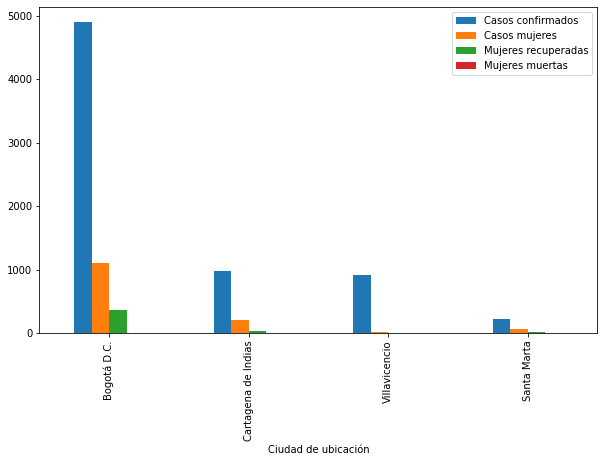

In [0]:
# Grafica de los datos
dfc_by_mujeres_pandas_merge.plot.bar(figsize=(10,6)).legend(["Casos confirmados", "Casos mujeres", "Mujeres recuperadas","Mujeres muertas"])
plt.show()

**Análisis de hombres**

In [0]:
#Hacemos el conteo de los hombres contagiados por ciudad
dfc_data.filter((dfc_data['Sexo']=='M')|(dfc_data['Sexo']=='m')).groupBy('Ciudad de ubicación').count().orderBy('count', ascending=False).show(10)

+--------------------+-----+
| Ciudad de ubicación|count|
+--------------------+-----+
|         Bogotá D.C.| 2526|
|       Villavicencio|  886|
|                Cali|  657|
| Cartagena de Indias|  537|
|             Leticia|  530|
|        Barranquilla|  399|
|             Soledad|  245|
|            Medellín|  160|
|San Andrés de Tumaco|  110|
|         Santa Marta|  109|
+--------------------+-----+
only showing top 10 rows



In [0]:
#Filtramos por hombres Jóvenes
dfc_by_hombres= dfc_data.filter(((dfc_data['Sexo']=='M')|(dfc_data['Sexo']=='m'))&(dfc_data['Edad']>=15)&(dfc_data['Edad']<=40)).groupBy('Ciudad de ubicación').count().orderBy('count', ascending=False)
dfc_by_hombres.show(10)

dfc_by_hombres_pandas = dfc_by_hombres.toPandas()
dfc_by_hombres_pandas.set_index("Ciudad de ubicación", inplace = True)

+-------------------+-----+
|Ciudad de ubicación|count|
+-------------------+-----+
|        Bogotá D.C.| 1243|
|      Villavicencio|  642|
|            Leticia|  283|
|               Cali|  272|
|Cartagena de Indias|  270|
|       Barranquilla|  191|
|            Soledad|  120|
|           Medellín|   75|
|            Ipiales|   66|
|             Ibagué|   53|
+-------------------+-----+
only showing top 10 rows



In [0]:
#Hombres jóvenes Recuperados
dfc_recuperado_hombres= dfc_data.filter(((dfc_data['Sexo']=='M')|(dfc_data['Sexo']=='m'))&(dfc_data['Edad']>=15)&(dfc_data['Edad']<=40)&(dfc_data['Estado']=='Recuperado')).groupBy('Ciudad de ubicación').count().orderBy('count', ascending=False)
dfc_recuperado_hombres.show(10)

dfc_recuperado_hombres_pandas = dfc_recuperado_hombres.toPandas()
dfc_recuperado_hombres_pandas.set_index("Ciudad de ubicación", inplace = True)

+-------------------+-----+
|Ciudad de ubicación|count|
+-------------------+-----+
|        Bogotá D.C.|  333|
|               Cali|   95|
|Cartagena de Indias|   37|
|           Medellín|   35|
|         Valledupar|   20|
|        Santa Marta|   17|
|      Villavicencio|   16|
|            Ciénaga|   16|
|       Barranquilla|   16|
|            Pereira|   15|
+-------------------+-----+
only showing top 10 rows



In [0]:
#Vemos cuántos hombres han muerto
dfc_data.filter(((dfc_data['Sexo']=='M')|(dfc_data['Sexo']=='m'))&(dfc_data['Fecha de muerte']!='-   -')).groupBy('Ciudad de ubicación').count().orderBy('count', ascending=False).show(10)

+--------------------+-----+
| Ciudad de ubicación|count|
+--------------------+-----+
|         Bogotá D.C.|   98|
|                Cali|   44|
| Cartagena de Indias|   32|
|             Leticia|   23|
|        Barranquilla|   13|
|         Santa Marta|   10|
|San Andrés de Tumaco|    6|
|             Soledad|    6|
|          Valledupar|    5|
|             Pereira|    5|
+--------------------+-----+
only showing top 10 rows



In [0]:
#Hombres jóvenes muertos
dfc_muerte_hombres= dfc_data.filter(((dfc_data['Sexo']=='M')|(dfc_data['Sexo']=='m'))&(dfc_data['Edad']>=15)&(dfc_data['Edad']<=40)&(dfc_data['Fecha de muerte']!='-   -')).groupBy('Ciudad de ubicación').count().orderBy('count', ascending=False)
dfc_muerte_hombres.show(10)

dfc_muerte_hombres_pandas = dfc_muerte_hombres.toPandas()
dfc_muerte_hombres_pandas.set_index("Ciudad de ubicación", inplace = True)

+-------------------+-----+
|Ciudad de ubicación|count|
+-------------------+-----+
|        Bogotá D.C.|    9|
|               Cali|    4|
|       Barranquilla|    3|
|             Ibagué|    2|
|           Pitalito|    2|
|Cartagena de Indias|    2|
|             Soacha|    1|
|            Ipiales|    1|
+-------------------+-----+



In [0]:
ciudad_pandas = dfc_by_ciudad.toPandas()[:10]#necesario para traer todas lasciudades donde hay muertes jóvenes
ciudad_pandas.set_index("Ciudad de ubicación", inplace = True)
dfc_by_hombres_pandas_merge = pd.merge(ciudad_pandas,dfc_by_hombres_pandas, left_index=True, right_index=True)
dfc_by_hombres_pandas_merge = pd.merge(dfc_by_hombres_pandas_merge,dfc_recuperado_hombres_pandas, left_index=True, right_index=True)
dfc_by_hombres_pandas_merge = pd.merge(dfc_by_hombres_pandas_merge,dfc_muerte_hombres_pandas, left_index=True, right_index=True)
dfc_by_hombres_pandas_merge

,count_x,count_y,count_x,count_y
Ciudad de ubicación,,,,
Bogotá D.C.,4892,1243,333,9
Cali,1237,272,95,4
Cartagena de Indias,982,270,37,2
Barranquilla,693,191,16,3


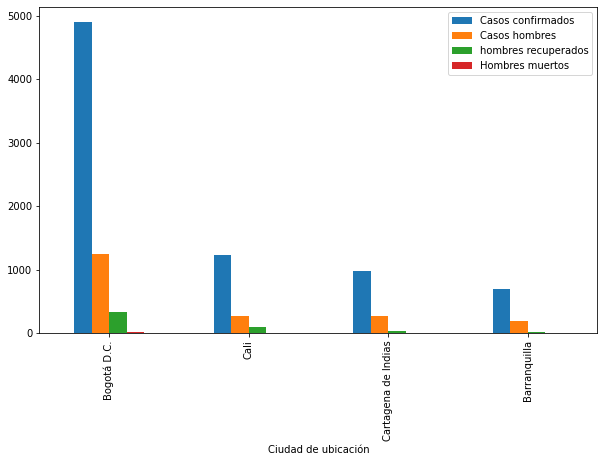

In [0]:
#Grafica de datos
dfc_by_hombres_pandas_merge.plot.bar(figsize=(10,6)).legend(["Casos confirmados", "Casos hombres", "hombres recuperados","Hombres muertos"])
plt.show()

**Ahora hacemos un análisis por fechas y país de procedencia**

In [0]:
dfc_by_diagnosticos = dfc_data.filter((dfc_data['Fecha diagnostico']!='-   -')&(dfc_data['País de procedencia']!='Colombia')).groupBy('País de procedencia').count().orderBy('count', ascending=False)
dfc_by_diagnosticos.show(10)

dfc_by_diagnosticos_pandas = dfc_by_diagnosticos.toPandas()
dfc_by_diagnosticos_pandas.set_index("País de procedencia", inplace = True)

+--------------------+-----+
| País de procedencia|count|
+--------------------+-----+
|              España|  259|
|Estados Unidos de...|  217|
|             Ecuador|   50|
|              México|   49|
|              Brasil|   37|
|              Panamá|   34|
|             Turquía|   28|
|             Jamaica|   16|
|             Francia|   16|
|         Reino Unido|   14|
+--------------------+-----+
only showing top 10 rows



In [0]:
dfc_by_muertes = dfc_data.filter((dfc_data['Fecha de muerte']!='-   -')&(dfc_data['País de procedencia']!='Colombia')).groupBy('País de procedencia').count().orderBy('count', ascending=False)
dfc_by_muertes.show(10)

dfc_by_muertes_pandas = dfc_by_muertes.toPandas()
dfc_by_muertes_pandas.set_index("País de procedencia", inplace = True)

+--------------------+-----+
| País de procedencia|count|
+--------------------+-----+
|Estados Unidos de...|    5|
|              España|    4|
|           Venezuela|    2|
|              Brasil|    2|
|              Egipto|    1|
|             Ecuador|    1|
|              Panamá|    1|
|#indicator+infect...|    1|
|            Alemania|    1|
|             Turquía|    1|
+--------------------+-----+



In [0]:
dfc_by_recuperados = dfc_data.filter((dfc_data['Fecha recuperado']!='-   -')&(dfc_data['País de procedencia']!='Colombia')).groupBy('País de procedencia').count().orderBy('count', ascending=False)
dfc_by_recuperados.show(10)

dfc_by_recuperados_pandas = dfc_by_recuperados.toPandas()
dfc_by_recuperados_pandas.set_index("País de procedencia", inplace = True)

+--------------------+-----+
| País de procedencia|count|
+--------------------+-----+
|              España|  230|
|Estados Unidos de...|  185|
|             Ecuador|   44|
|              México|   40|
|              Panamá|   28|
|             Turquía|   24|
|              Brasil|   17|
|             Jamaica|   16|
|             Francia|   15|
|         Reino Unido|   14|
+--------------------+-----+
only showing top 10 rows



In [0]:
dfc_by_pais_pandas_merge = pd.merge(dfc_by_diagnosticos_pandas, dfc_by_muertes_pandas, left_index=True, right_index=True)
dfc_by_pais_pandas_merge = pd.merge(dfc_by_pais_pandas_merge,dfc_by_recuperados_pandas, left_index=True, right_index=True)
dfc_by_pais_pandas_merge

,count_x,count_y,count
País de procedencia,,,
España,259,4,230
Estados Unidos de América,217,5,185
Ecuador,50,1,44
Brasil,37,2,17
Panamá,34,1,28
Turquía,28,1,24
Egipto,11,1,6
Alemania,10,1,9
Venezuela,4,2,1


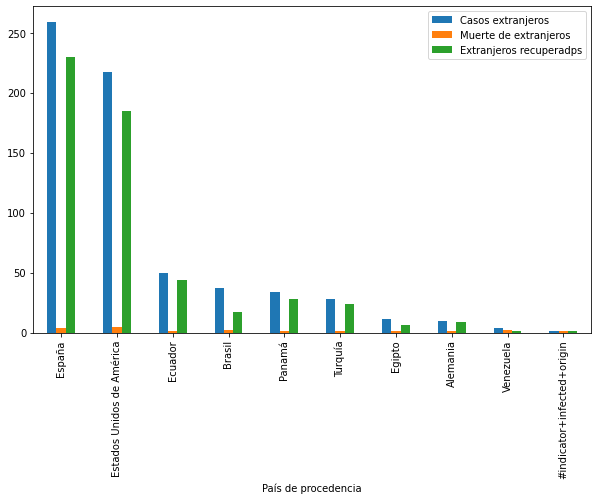

In [0]:
#Grafica de datos
dfc_by_pais_pandas_merge.plot.bar(figsize=(10,6)).legend(["Casos extranjeros", "Muerte de extranjeros", "Extranjeros recuperadps"])
plt.show()